In [103]:
library(RCurl)
library(XML)
library (httr)
library(rvest)
library(dplyr)
library(xml2)
library(rio)
library(rgexf)
library(tidyverse)
library(igraph)
library(ggraph)
library(networkD3)
library(webshot)
library(igraph)
library(RColorBrewer)
library(clipr)
library(lubridate)
library(GGally)

Warning message:
"package 'GGally' was built under R version 4.2.2"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [4]:
data_movie <- read.csv(file = 'data/data_movies_1.csv', header = TRUE)
data_movie

X.1,X,movie_name,rating,types,year,duration,audience_rating,expert_rating
<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
1,1,PERCY JACKSON & THE OLYMPIANS: THE LIGHTNING THIEF,PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",2010,1h59m,49,53
2,2,PLEASE GIVE,R,Comedy,2010,1h30m,87,64
3,3,10,R,"Comedy, Romance",1979,2h2m,67,53
4,4,12 ANGRY MEN (TWELVE ANGRY MEN),NR,"Classics, Drama",1957,1h35m,100,97
5,5,"20,000 LEAGUES UNDER THE SEA",G,"Action & Adventure, Drama, Kids & Family",1954,2h7m,89,74
6,6,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",2008,1h49m,8,37
7,7,THE 39 STEPS,NR,"Action & Adventure, Classics, Mystery & Suspense",1935,1h20m,96,86
8,8,3:10 TO YUMA,NR,"Classics, Drama, Western",1957,1h32m,96,79
9,9,CHARLY (A HEARTBEAT AWAY),PG,"Comedy, Drama, Romance",2002,1h43m,20,87


In [9]:
filter_movies_by_type <- function(data_movie, type) {
  # Split the 'types' column on ',', 'and', and '/' characters
  data_movie$types <- strsplit(data_movie$types, ',|and|/')
  
  # Convert the resulting list to a character vector
  data_movie$types <- sapply(data_movie$types, function(x) paste(x, collapse = ','))
  
  # Subset the data_movie dataframe to include only rows where the 'types' column contains the desired type
  filtered_movies <- data_movie[grepl(type, data_movie$types), ]
  
  return(filtered_movies)
}

In [11]:
filtered_movies <- filter_movies_by_type(data_movie, "Action")
filtered_movies

,X.1,X,movie_name,rating,types,year,duration,audience_rating,expert_rating
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
1,1,1,PERCY JACKSON & THE OLYMPIANS: THE LIGHTNING THIEF,PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",2010,1h59m,49,53
5,5,5,"20,000 LEAGUES UNDER THE SEA",G,"Action & Adventure, Drama, Kids & Family",1954,2h7m,89,74
6,6,6,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",2008,1h49m,8,37
7,7,7,THE 39 STEPS,NR,"Action & Adventure, Classics, Mystery & Suspense",1935,1h20m,96,86
19,19,19,THE ADVENTURES OF MARK TWAIN,G,"Action & Adventure, Animation, Kids & Family",1985,1h26m,80,82
21,21,21,THE ADVENTURES OF ROBIN HOOD,PG,"Action & Adventure, Classics, Romance",1938,1h42m,100,89
29,29,29,RUNNING SCARED,R,"Action & Adventure, Drama, Mystery & Suspense",2006,2h1m,41,79
31,31,31,ULTRAVIOLET,PG-13,"Action & Adventure, Drama, Horror, Science Fiction & Fantasy",2006,1h28m,8,30
32,32,32,HOME OF THE BRAVE,R,"Action & Adventure, Documentary, Drama, Special Interest",2004,1h15m,93,48


In [25]:
classify_movies_by_rating <- function(data_movie) {
  # Create a new column called 'rating_class' and initialize it to NA
  data_movie$audience_class <- 0
  
  # Classify movies with an audience rating between 0 and 20 as "low"
  data_movie$audience_class[data_movie$audience_rating >= 0 & data_movie$audience_rating <= 20] <- 1
  
  # Classify movies with an audience rating between 21 and 40 as "medium"
  data_movie$audience_class[data_movie$audience_rating >= 21 & data_movie$audience_rating <= 40] <- 2
  
  # Classify movies with an audience rating between 41 and 60 as "high"
  data_movie$audience_class[data_movie$audience_rating >= 41 & data_movie$audience_rating <= 60] <- 3
  
  # Classify movies with an audience rating between 61 and 80 as "very high"
  data_movie$audience_class[data_movie$audience_rating >= 61 & data_movie$audience_rating <= 80] <- 4
  
  # Classify movies with an audience rating between 81 and 100 as "exceptional"
  data_movie$audience_class[data_movie$audience_rating >= 81 & data_movie$audience_rating <= 100] <- 5
  
  return(data_movie)
}

In [26]:
classify_movies_by_expert <- function(data_movie) {
  # Create a new column called 'rating_class' and initialize it to NA
  data_movie$expert_class <- 0
  
  # Classify movies with an audience rating between 0 and 20 as "low"
  data_movie$expert_class[data_movie$expert_rating >= 0 & data_movie$expert_rating <= 20] <- 1
  
  # Classify movies with an audience rating between 21 and 40 as "medium"
  data_movie$expert_class[data_movie$expert_rating >= 21 & data_movie$expert_rating <= 40] <- 2
  
  # Classify movies with an audience rating between 41 and 60 as "high"
  data_movie$expert_class[data_movie$expert_rating >= 41 & data_movie$expert_rating <= 60] <- 3
  
  # Classify movies with an audience rating between 61 and 80 as "very high"
  data_movie$expert_class[data_movie$expert_rating >= 61 & data_movie$expert_rating <= 80] <- 4
  
  # Classify movies with an audience rating between 81 and 100 as "exceptional"
  data_movie$expert_class[data_movie$expert_rating >= 81 & data_movie$expert_rating <= 100] <- 5
  
  return(data_movie)
}

In [27]:
action_classed <- classify_movies_by_rating(filtered_movies)
action_classed <- classify_movies_by_expert(action_classed)
action_classed

,X.1,X,movie_name,rating,types,year,duration,audience_rating,expert_rating,audience_class,expert_class
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,1,1,PERCY JACKSON & THE OLYMPIANS: THE LIGHTNING THIEF,PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",2010,1h59m,49,53,3,3
5,5,5,"20,000 LEAGUES UNDER THE SEA",G,"Action & Adventure, Drama, Kids & Family",1954,2h7m,89,74,5,4
6,6,6,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",2008,1h49m,8,37,1,2
7,7,7,THE 39 STEPS,NR,"Action & Adventure, Classics, Mystery & Suspense",1935,1h20m,96,86,5,5
19,19,19,THE ADVENTURES OF MARK TWAIN,G,"Action & Adventure, Animation, Kids & Family",1985,1h26m,80,82,4,5
21,21,21,THE ADVENTURES OF ROBIN HOOD,PG,"Action & Adventure, Classics, Romance",1938,1h42m,100,89,5,5
29,29,29,RUNNING SCARED,R,"Action & Adventure, Drama, Mystery & Suspense",2006,2h1m,41,79,3,4
31,31,31,ULTRAVIOLET,PG-13,"Action & Adventure, Drama, Horror, Science Fiction & Fantasy",2006,1h28m,8,30,1,2
32,32,32,HOME OF THE BRAVE,R,"Action & Adventure, Documentary, Drama, Special Interest",2004,1h15m,93,48,5,3


In [28]:
dropped_columns <- c(
    'X.1',
    'X',
    'rating',
    'types',
    'year',
    'duration',
    'audience_rating',
    'audience_count',
    'expert_rating'
)

In [29]:
action_classed = action_classed[,!(names(action_classed) %in% dropped_columns)]
action_classed

,movie_name,audience_class,expert_class
,<chr>,<dbl>,<dbl>
1,PERCY JACKSON & THE OLYMPIANS: THE LIGHTNING THIEF,3,3
5,"20,000 LEAGUES UNDER THE SEA",5,4
6,"10,000 B.C.",1,2
7,THE 39 STEPS,5,5
19,THE ADVENTURES OF MARK TWAIN,4,5
21,THE ADVENTURES OF ROBIN HOOD,5,5
29,RUNNING SCARED,3,4
31,ULTRAVIOLET,1,2
32,HOME OF THE BRAVE,5,3


In [45]:
# Create a new column that combines the audience and expert classification
action_classed <- action_classed %>%
  mutate(classification = paste(audience_class, expert_class, sep = "-"))

# Count the number of movies in each classification category
class_counts <- action_classed %>%
  group_by(classification) %>%
  summarize(count = n())

# Sort the class_counts data frame in descending order by count
class_counts <- class_counts %>%
  arrange(desc(count))

# Print the results
class_counts

classification,count
<chr>,<int>
5-5,434
4-4,370
5-4,340
3-3,299
1-2,292
2-3,284
2-2,230
4-3,229
3-4,209


In [54]:
# Load necessary packages
library(ggplot2)

# Create a ggplot object using the class_counts data frame
p <- ggplot(data = class_counts, aes(x = classification, y = count)) +
  geom_col(fill = "dodgerblue") +  # Add fill color to columns
  labs(x = "Classification", y = "Count", title = "Movie Classification Counts") +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Increase title font size
        axis.text.x = element_text(angle = 45, hjust = 1, size = 15),  # Rotate tick labels and adjust horizontal alignment
        axis.title = element_text(size = 15, face = "bold"),  # Increase axis title font size
        plot.background = element_rect(fill = "pink"),  # Add background color to plot
        panel.background = element_rect(fill = "lightgreen"))  # Add background color to plot panels

# Rotate plot and swap x-axis and y-axis
p <- p + coord_flip()

# Save the plot to a file with the desired dimensions
ggsave("plot.png", plot = p, width = 8, height = 5)

In [66]:
action_classed$difference <- abs(action_classed$audience_class - action_classed$expert_class)

# Create a bar chart showing the count of movies in each difference category
p <- ggplot(data = action_classed, aes(x = difference, fill = difference)) +
  geom_bar(width = 0.5, color = "black") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(title = "Count of Movies in Each Difference Category", x = "Difference", y = "Count")

# Save the plot as a PNG file
ggsave(filename = "difference_plot_action.png", plot = p, width = 8, height = 6)

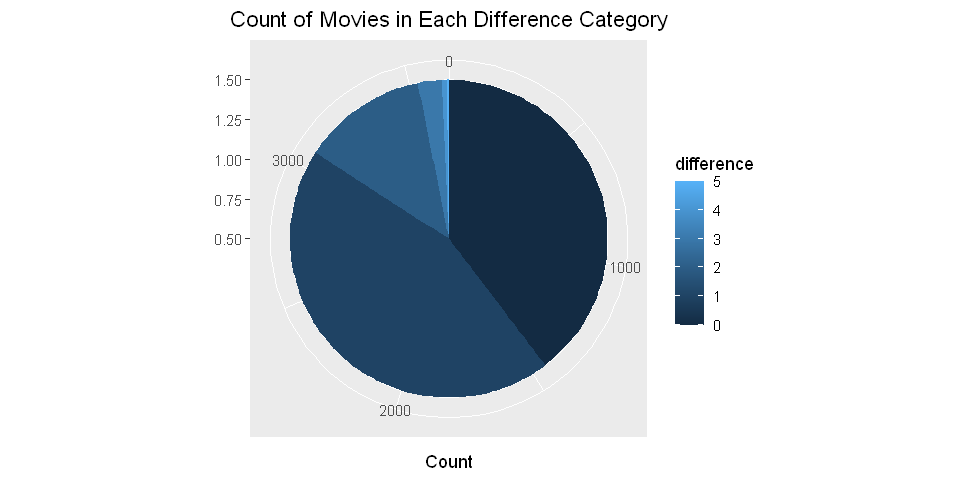

In [127]:
action_classed$difference <- abs(action_classed$audience_class - action_classed$expert_class)

# Create a new data frame that counts the number of occurrences of each value in the difference column
difference_count <- action_classed %>%
  group_by(difference) %>%
  summarize(count = n()) %>%
  rename(difference = difference)
# Create a pie chart showing the count of movies in each difference category
p <- ggplot(data = difference_count, aes(x = 1, y = count, fill = difference)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(title = "Count of Movies in Each Difference Category", x = "", y = "Count")

# Display the plot
print(p)
ggsave(filename = "difference_pie_action.png", plot = p, width = 8, height = 6)

In [78]:
data_movie

X.1,X,movie_name,rating,types,year,duration,audience_rating,expert_rating
<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
1,1,PERCY JACKSON & THE OLYMPIANS: THE LIGHTNING THIEF,PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",2010,1h59m,49,53
2,2,PLEASE GIVE,R,Comedy,2010,1h30m,87,64
3,3,10,R,"Comedy, Romance",1979,2h2m,67,53
4,4,12 ANGRY MEN (TWELVE ANGRY MEN),NR,"Classics, Drama",1957,1h35m,100,97
5,5,"20,000 LEAGUES UNDER THE SEA",G,"Action & Adventure, Drama, Kids & Family",1954,2h7m,89,74
6,6,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",2008,1h49m,8,37
7,7,THE 39 STEPS,NR,"Action & Adventure, Classics, Mystery & Suspense",1935,1h20m,96,86
8,8,3:10 TO YUMA,NR,"Classics, Drama, Western",1957,1h32m,96,79
9,9,CHARLY (A HEARTBEAT AWAY),PG,"Comedy, Drama, Romance",2002,1h43m,20,87


In [85]:
# Calculate the mean audience rating for all movies
mean_audience_rating <- mean(data_movie$audience_rating, na.rm=TRUE)
mean_audience_rating

[1] 60.95089

In [87]:
# Calculate the mean expert rating for all movies
mean_expert_rating <- mean(data_movie$expert_rating, na.rm=TRUE)
mean_expert_rating

[1] 60.61437

In [93]:
# Parse the duration values into a numeric format
data_movie$duration <- parse_duration(data_movie$duration)

# Calculate the total duration of movies for each type
type_duration <- data_movie %>% group_by(type) %>% summarize(total_duration=sum(duration, na.rm=TRUE))

ERROR: Error in parse_duration(data_movie$duration): could not find function "parse_duration"


In [95]:
# Calculate the correlation between audience rating and expert rating
correlation <- cor(data_movie$audience_rating, data_movie$expert_rating, use="complete.obs")
correlation

[1] 0.6496349

ERROR: [1m[33mError[39m in `ggplot()`:[22m
[33m![39m   You're passing a function as global data.
  Have you misspelled the `data` argument in `ggplot()`


`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 436 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 436 rows containing missing values (geom_point)."


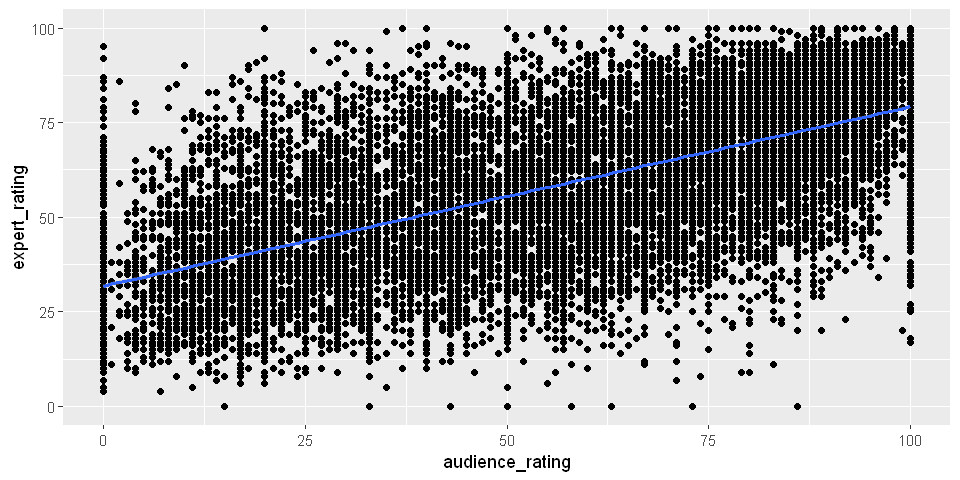

In [100]:
# Visualize the relationship between audience rating and expert rating
ggplot(data_movie, aes(x=audience_rating, y=expert_rating)) + geom_point() + geom_smooth(method = "lm")

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 436 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 436 rows containing missing values (geom_point)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 436 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 436 rows containing missing values (geom_point)."


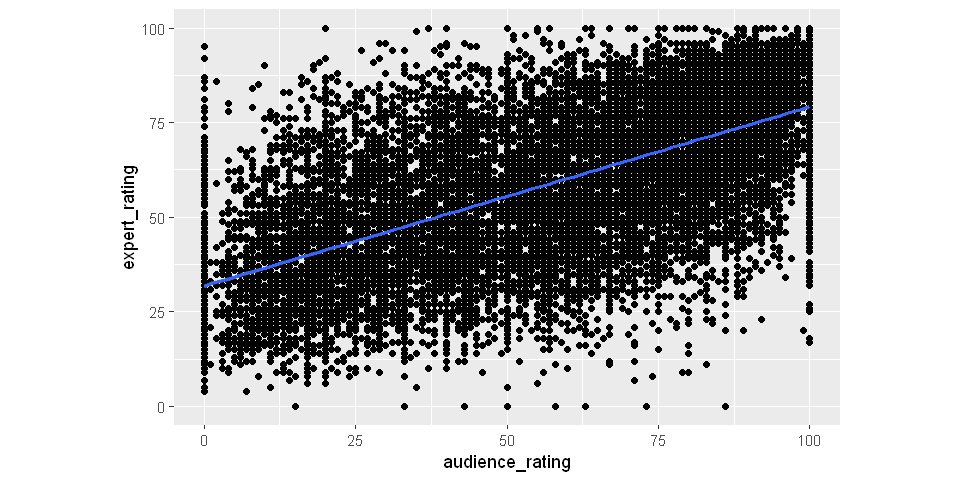

In [116]:
ggplot(data_movie, aes(x=audience_rating, y=expert_rating)) + 
  geom_point() + 
  geom_smooth(method = "lm") +
  coord_fixed(ratio = 5/8)

ggsave("plot_xy.png", width = 8, height = 5)

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 9 rows containing missing values (geom_point)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 9 rows containing missing values (geom_point)."


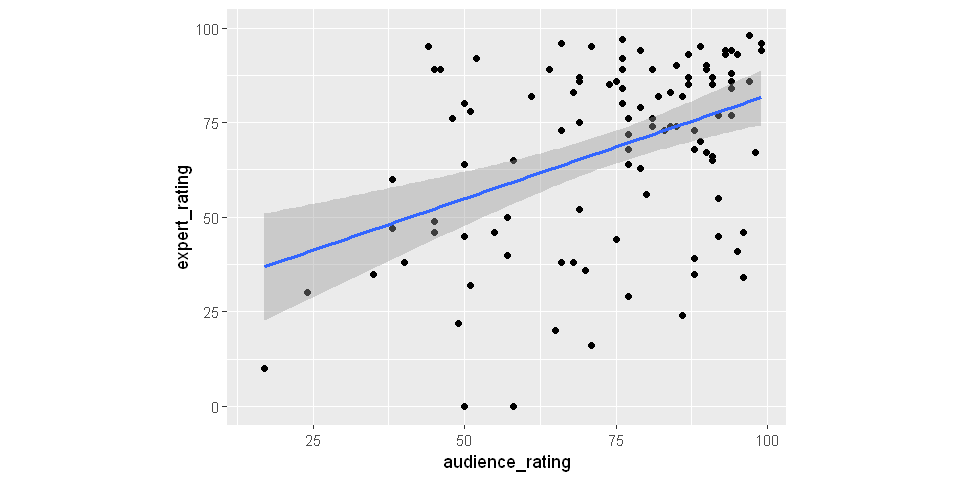

In [115]:
ggplot(data_movie %>% filter(year == 2001), aes(x=audience_rating, y=expert_rating)) + 
  geom_point() + 
  geom_smooth(method = "lm") +
  coord_fixed(ratio = 5/8)
ggsave("plot_xy_2001.png", width = 8, height = 5)

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 90 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 90 rows containing missing values (geom_point)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 90 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 90 rows containing missing values (geom_point)."


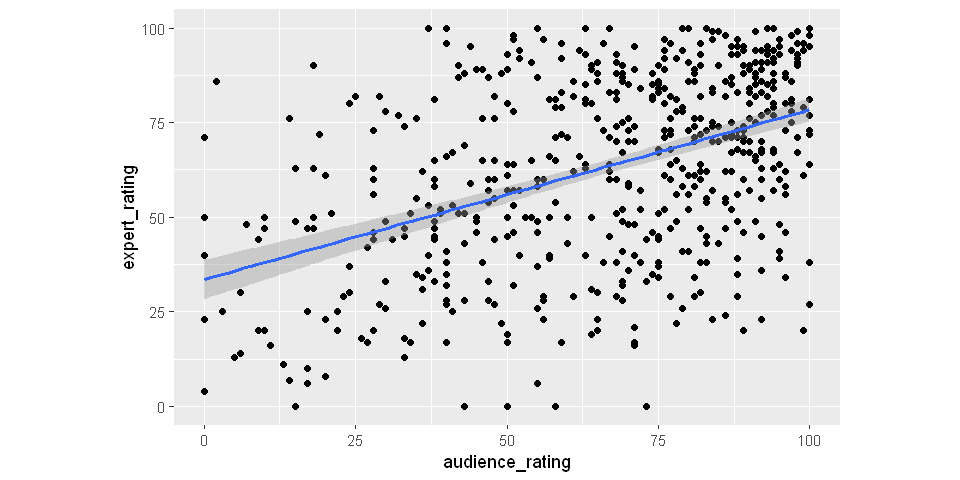

In [129]:
ggplot(data_movie %>% filter(year %in% c(2020, 2021, 2022)), aes(x=audience_rating, y=expert_rating)) + 
  geom_point() + 
  geom_smooth(method = "lm") +
  coord_fixed(ratio = 5/8)
ggsave("plot_xy_20202122.png", width = 8, height = 5)

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 1284 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 1170 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1284 rows containing missing values (geom_point)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 1284 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 1170 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1284 rows containing missing values (geom_point)."


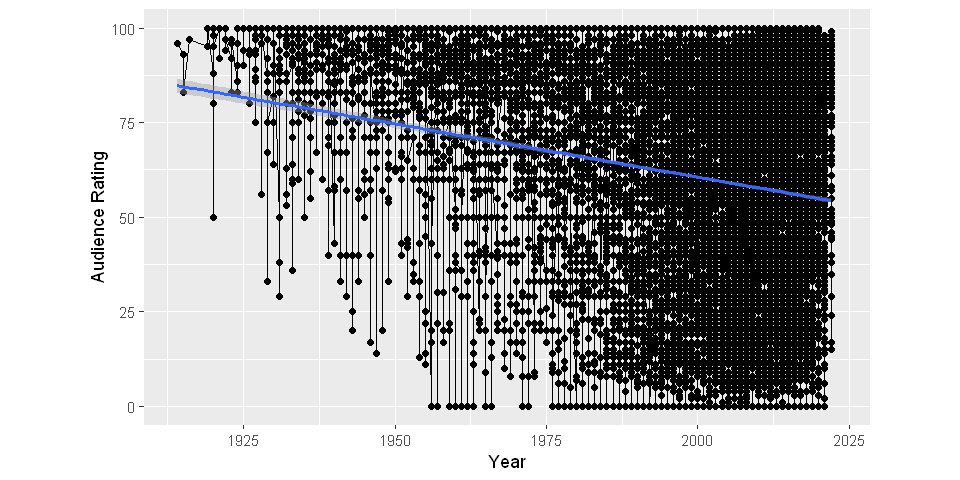

In [124]:
ggplot(data_movie, aes(x = year, y = audience_rating)) +
  geom_line() +
  geom_point() +
  geom_smooth(method = "lm") +
  coord_fixed(ratio = 5/8) +
  labs(x = "Year", y = "Audience Rating")
ggsave("plot_average_audience_rating_year.png", width = 8, height = 5)

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 1452 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 1170 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1452 rows containing missing values (geom_point)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 1452 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 1170 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1452 rows containing missing values (geom_point)."


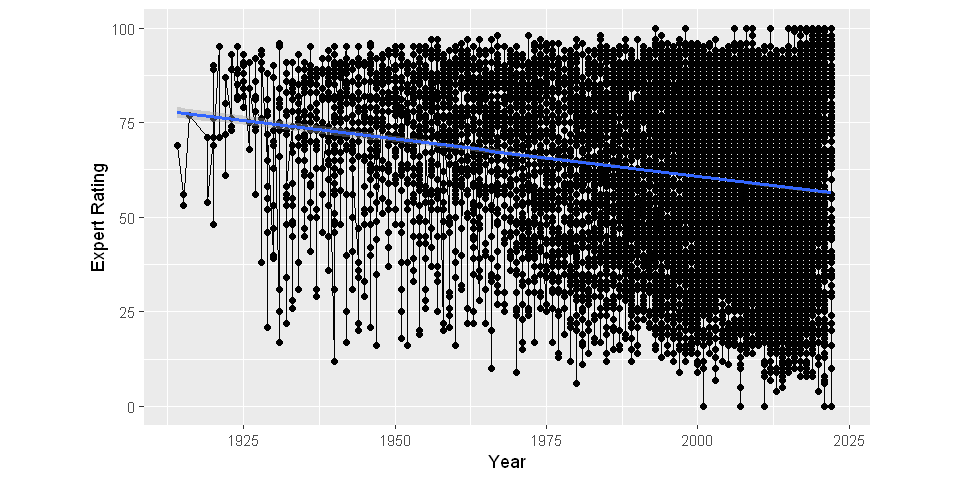

In [125]:
ggplot(data_movie, aes(x = year, y = expert_rating)) +
  geom_line() +
  geom_point() +
  geom_smooth(method = "lm") +
  coord_fixed(ratio = 5/8) +
  labs(x = "Year", y = "Expert Rating")
ggsave("plot_average_expert_rating_year.png", width = 8, height = 5)